In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime 
#plt.style.use('dark_background')

%matplotlib inline
sns.set_style("whitegrid")

## Dataset Description
#### Type: Timeseries, Multivariate

The dataset consist on the reading of 14 temperature modulated mox sensors.
Each experiment consists of 100 measurements: 10 experimental mixtures uniformly distributed in the range of 0 - 20 ppm and 10 replicates per concentration.

At the begining of each experiment the gas chamber is cleaned by 15 mins using a stream of 240 mln/min. And after that the gas mixtures are released at 240mln/min, thus assuming the flow rate is constant.

A single experiment lasted 25 hours (100 samples x 15 minutes / sample) and was replicated on 13 working days.


## Data Loading

In [86]:
path = "./dataset"

# I get a list of the filenames for later use in a for loop.
# Then they get sorted by name and the last file which is the Readme.txt gets sliced.
files = sorted(os.listdir(path))[:-1]
files

['20160930_203718.csv',
 '20161001_231809.csv',
 '20161003_085624.csv',
 '20161004_104124.csv',
 '20161005_140846.csv',
 '20161006_182224.csv',
 '20161007_210049.csv',
 '20161008_234508.csv',
 '20161010_095046.csv',
 '20161011_113032.csv',
 '20161013_143355.csv',
 '20161014_184659.csv',
 '20161016_053656.csv']

In [87]:
def load_multiple(files, path):
    df_list = []
    for d in files:
        path_to_file = path + '/' + d
        temp = pd.read_csv(path_to_file)
        df_list.append(temp)
    
    return df_list

In [127]:
dfs = load_multiple(files[:1], path)
dfs

[         Time (s)  CO (ppm)  Humidity (%r.h.)  Temperature (C)  \
 0           0.309       0.0             55.84            26.62   
 1           0.618       0.0             55.84            26.62   
 2           0.926       0.0             55.84            26.62   
 3           1.234       0.0             55.84            26.62   
 4           1.544       0.0             55.84            26.62   
 ...           ...       ...               ...              ...   
 295713  90908.545       0.0             62.30            26.58   
 295714  90908.853       0.0             62.30            26.58   
 295715  90909.162       0.0             62.30            26.58   
 295716  90909.469       0.0             62.30            26.58   
 295717  90909.778       0.0             62.30            26.58   
 
         Flow rate (mL/min)  Heater voltage (V)  R1 (MOhm)  R2 (MOhm)  \
 0                 241.6323              0.2112     2.1314     5.3552   
 1                 241.3888              0.2070 

In [146]:
df = pd.concat(dfs)

In [147]:
df.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),...,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
0,0.309,0.0,55.84,26.62,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.618,0.0,55.84,26.62,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.926,0.0,55.84,26.62,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.234,0.0,55.84,26.62,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.544,0.0,55.84,26.62,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Binning of time series to reduce instrumental noise.

In [148]:
df['Time (s)'] = pd.to_timedelta(df['Time (s)'], unit='sec')
df = df.set_index('Time (s)')

In [149]:
df_min_idx = df.resample('1min').mean()
df_min_idx.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),...,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
Time (s),,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00.309000,0.0,55.422103,26.620000,240.085452,0.320221,11.558287,13.750047,17.821017,14.622826,28.315183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:00.309000,0.0,54.836240,26.604960,239.938198,0.373072,11.028436,13.462196,16.799985,12.493766,23.864415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:00.309000,0.0,54.371756,26.583364,239.983129,0.376968,8.277889,9.748912,13.219300,12.800074,23.804222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:03:00.309000,0.0,53.947546,26.580000,239.988024,0.315504,11.605739,13.818303,17.889520,15.080879,28.380545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:04:00.309000,0.0,53.820000,26.580000,240.024338,0.375702,11.069220,13.468043,16.835122,12.801713,23.964617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
print('Features: ', df.columns.tolist())
print('\nMissing Values: ', df.isnull().any())

Features:  ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)', '0.0000', '0.0000.1', '49.7534', '23.7184', '233.2737', '0.8993', '0.2231', '0.6365', '1.1493', '0.8483', '1.2534', '1.4449', '1.9906', '1.3303', '1.4480', '1.9148', '3.4651', '5.2144', '6.5806', '8.6385']

Missing Values:  CO (ppm)              False
Humidity (%r.h.)      False
Temperature (C)       False
Flow rate (mL/min)    False
Heater voltage (V)    False
R1 (MOhm)             False
R2 (MOhm)             False
R3 (MOhm)             False
R4 (MOhm)             False
R5 (MOhm)             False
R6 (MOhm)             False
R7 (MOhm)             False
R8 (MOhm)             False
R9 (MOhm)             False
R10 (MOhm)            False
R11 (MOhm)            False
R12 (MOhm)            False
R13 (M

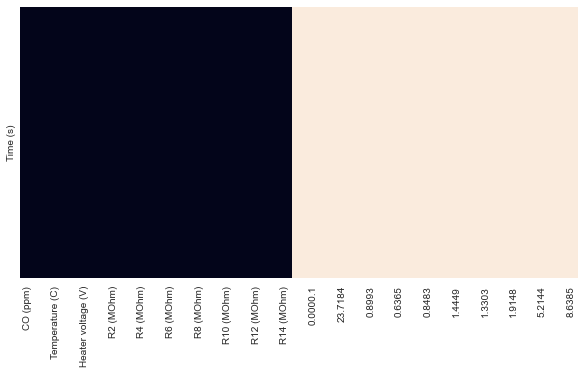

In [152]:
hm = sns.heatmap(df_min_idx.isnull(), cbar=False, yticklabels=False)
hm = plt.gcf()
hm.set_size_inches(10,5)

In [134]:
print('\nUnique Values:\n ', df.nunique())


Unique Values:
  CO (ppm)                309
Humidity (%r.h.)      17261
Temperature (C)        5624
Flow rate (mL/min)    11389
Heater voltage (V)     1721
R1 (MOhm)              8523
R2 (MOhm)              8257
R3 (MOhm)              8241
R4 (MOhm)              7567
R5 (MOhm)              7913
R6 (MOhm)              7861
R7 (MOhm)              7820
R8 (MOhm)              6282
R9 (MOhm)              6217
R10 (MOhm)             6458
R11 (MOhm)             6191
R12 (MOhm)             6281
R13 (MOhm)             6361
R14 (MOhm)             6193
0.0000                    0
0.0000.1                  0
49.7534                   0
23.7184                   0
233.2737                  0
0.8993                    0
0.2231                    0
0.6365                    0
1.1493                    0
0.8483                    0
1.2534                    0
1.4449                    0
1.9906                    0
1.3303                    0
1.4480                    0
1.9148                    0
3.

In [135]:
df_min_idx = df_min_idx.iloc[:,:19]
df_min_idx.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
0 days 00:00:00.309000,0.0,55.422103,26.620000,240.085452,0.320221,11.558287,13.750047,17.821017,14.622826,28.315183,25.835128,28.538694,37.498795,28.100217,41.510512,43.213744,36.609759,32.831897,46.413285
0 days 00:01:00.309000,0.0,54.836240,26.604960,239.938198,0.373072,11.028436,13.462196,16.799985,12.493766,23.864415,22.191330,24.319815,32.473228,24.197874,35.957541,37.168889,31.602220,28.349265,39.634827
0 days 00:02:00.309000,0.0,54.371756,26.583364,239.983129,0.376968,8.277889,9.748912,13.219300,12.800074,23.804222,21.304278,23.815598,32.360072,24.888168,36.287549,37.403987,32.045344,28.986611,40.825963
0 days 00:03:00.309000,0.0,53.947546,26.580000,239.988024,0.315504,11.605739,13.818303,17.889520,15.080879,28.380545,26.065074,28.552634,38.887382,28.813097,42.605466,44.259972,37.555599,34.184503,47.774609
0 days 00:04:00.309000,0.0,53.820000,26.580000,240.024338,0.375702,11.069220,13.468043,16.835122,12.801713,23.964617,22.204716,24.214074,34.833126,25.880686,38.284461,39.683156,33.462278,30.677077,42.758870


### Exploratory Analysis 

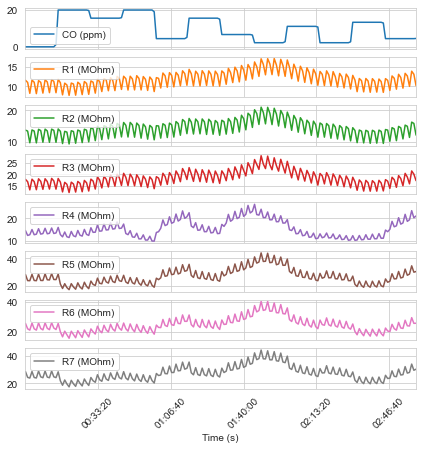

In [136]:
df_min_idx[['CO (ppm)','R1 (MOhm)','R2 (MOhm)','R3 (MOhm)'
            ,'R4 (MOhm)','R5 (MOhm)','R6 (MOhm)'
            ,'R7 (MOhm)']].loc['00:00:00':'02:00:00'].plot(subplots=True,grid=True,figsize=(7,7))
plt.xticks(rotation=45);#;

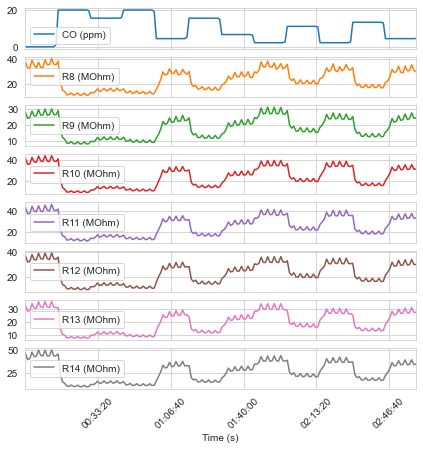

In [137]:
df_min_idx[['CO (ppm)','R8 (MOhm)','R9 (MOhm)','R10 (MOhm)'
            ,'R11 (MOhm)','R12 (MOhm)','R13 (MOhm)'
            ,'R14 (MOhm)']].loc['00:00:00':'02:00:00'].plot(subplots=True,grid=True,figsize=(7,7))
plt.xticks(rotation=45);#;

In [138]:
df_min_corr = df_min_idx.corr()
df_min_corr.head()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
CO (ppm),1.000000,-0.107344,-0.132661,0.034380,0.002377,0.054183,0.082200,-0.009611,-0.076143,-0.237126,-0.181310,-0.224519,-0.872117,-0.846508,-0.890659,-0.895667,-0.890463,-0.892427,-0.891794
Humidity (%r.h.),-0.107344,1.000000,0.157742,-0.034968,-0.005165,-0.397936,-0.458440,-0.465210,-0.789957,-0.514864,-0.451694,-0.466798,0.033551,0.024207,0.096923,0.088068,0.052163,0.001203,0.078886
Temperature (C),-0.132661,0.157742,1.000000,-0.009578,-0.002938,-0.150013,-0.154834,-0.153538,-0.142925,-0.098811,-0.102979,-0.098051,0.091056,0.107238,0.105543,0.097590,0.093599,0.067321,0.102594
Flow rate (mL/min),0.034380,-0.034968,-0.009578,1.000000,0.132151,-0.059845,-0.047594,-0.055552,-0.004493,-0.037384,-0.049483,-0.045929,-0.079377,-0.069135,-0.073801,-0.073463,-0.075999,-0.061426,-0.070914
Heater voltage (V),0.002377,-0.005165,-0.002938,0.132151,1.000000,-0.251396,-0.231555,-0.262060,-0.213835,-0.287708,-0.282384,-0.299672,-0.168700,-0.160462,-0.138764,-0.149385,-0.165446,-0.147579,-0.146993


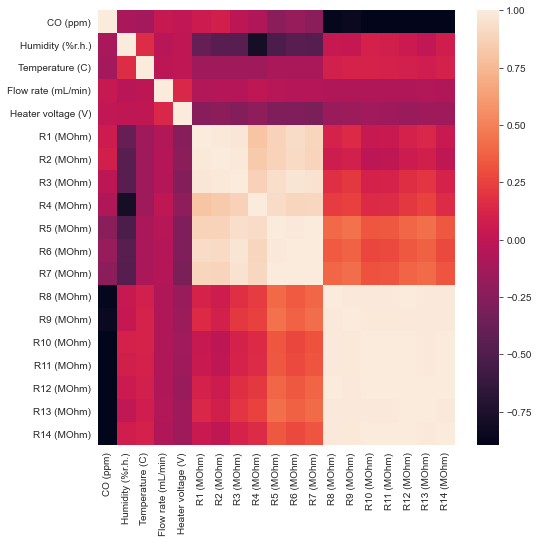

In [139]:
ax = sns.heatmap(df_min_corr, annot=False)
heat_map=plt.gcf()
heat_map.set_size_inches(8,8)

### Central Tendencies

In [140]:
size = (8,8)

In [141]:
df_min_idx.describe()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,9.896093,45.972020,26.476439,239.884178,0.355220,14.967670,17.400945,22.239582,18.429810,31.060935,28.780240,31.681237,25.723823,21.305998,25.240752,27.104396,24.847215,21.753315,27.995008
std,6.420428,12.303733,0.211225,2.715880,0.026876,5.211581,6.502336,7.343663,6.440788,8.623254,8.423511,8.528921,9.628197,8.672062,11.920468,11.155434,9.660471,9.537455,12.459740
min,0.000000,17.500000,26.092287,134.422239,0.223758,7.326499,8.367683,10.754528,6.503751,14.959739,13.761627,15.564548,10.411518,8.277638,8.296669,10.507841,9.503977,7.548797,10.321475
25%,4.440000,36.374671,26.300000,239.951317,0.319177,11.794823,13.572176,17.685517,13.882232,24.942057,23.136936,25.779707,17.462771,13.956849,15.284294,17.975985,16.581467,13.505872,17.296007
50%,8.890000,46.801321,26.470510,239.972407,0.372639,13.727241,16.001013,20.412852,17.236274,29.554517,26.909296,30.124946,24.313347,20.102404,23.291010,25.239148,23.652356,20.316290,25.785910
75%,15.560000,55.328356,26.620000,239.990215,0.374797,16.166070,18.589094,24.141890,21.481916,35.118012,31.962092,35.557444,32.844533,27.145166,33.755207,34.953466,31.607999,28.594944,36.866232
max,20.000000,71.812721,26.916644,240.596064,0.380970,38.761105,50.981654,60.894744,46.539535,67.793091,67.087644,69.344759,55.404323,48.691589,59.523716,59.025461,53.343277,49.515878,62.442894


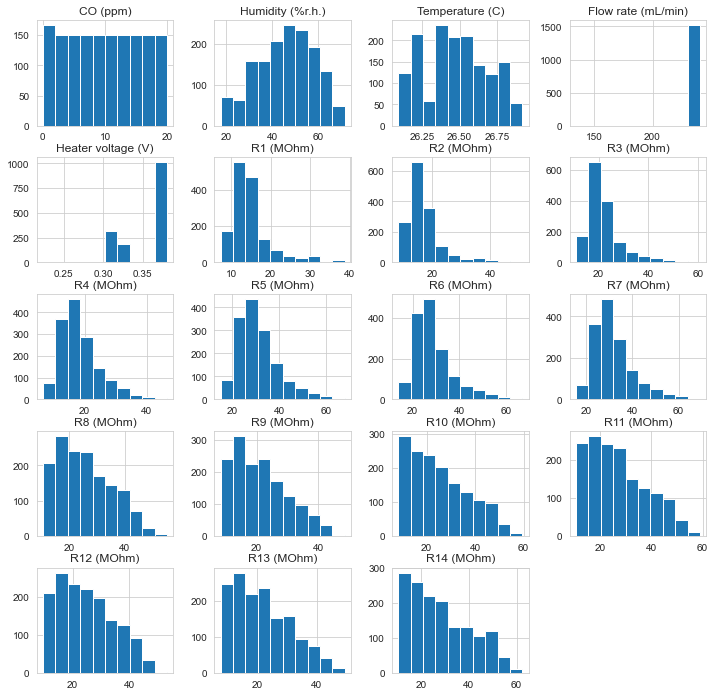

In [142]:
df_min_idx.hist(figsize=(12,12));#;

In the describe dataframe we can see that the 75% quartile value and the max value from the sensors readings have a large gap between them, this indicates the presence of outliers.

### Time Analysis.

In [119]:
features = ['CO (ppm)','R1 (MOhm)','R2 (MOhm)','R3 (MOhm)','R4 (MOhm)','R5 (MOhm)',
            'R6 (MOhm)','R7 (MOhm)','R8 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)','R12 (MOhm)','R13 (MOhm)','R14 (MOhm)']

array([<AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>],
      dtype=object)

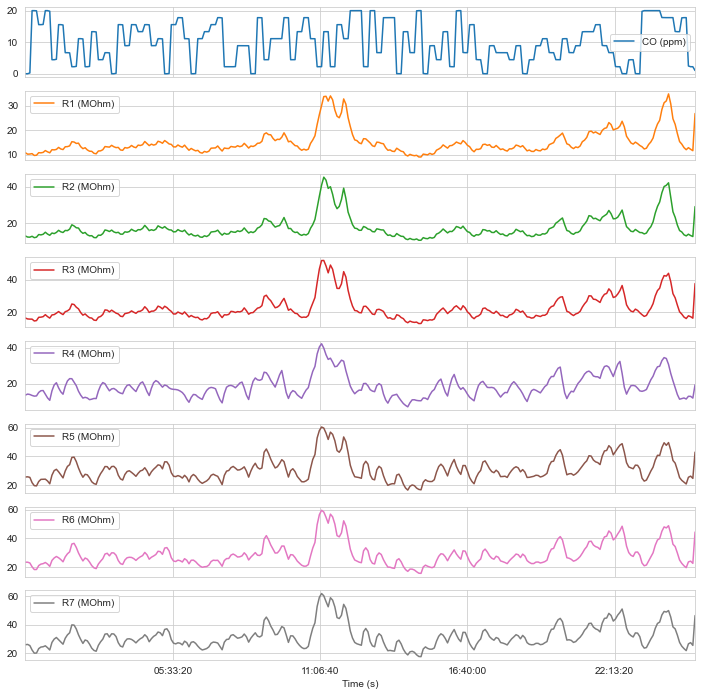

In [143]:
df_min_idx[features[:8]].resample('5min').mean().plot(subplots=True,figsize=(12,12))

array([<AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>, <AxesSubplot:xlabel='Time (s)'>,
       <AxesSubplot:xlabel='Time (s)'>], dtype=object)

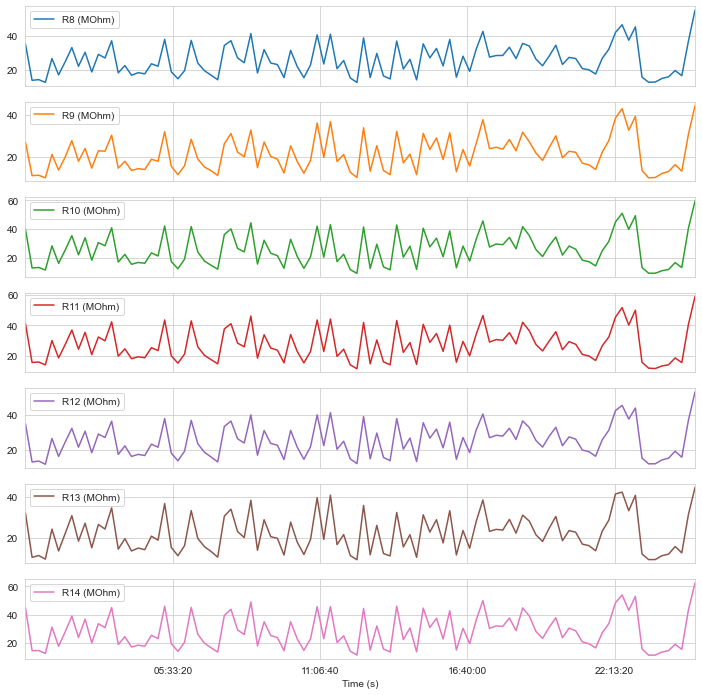

In [144]:
df_min_idx[features[8:]].resample('15min').mean().plot(subplots=True,figsize=(12,12))

### Lag Analysis

### Correlation in different sample intervals.

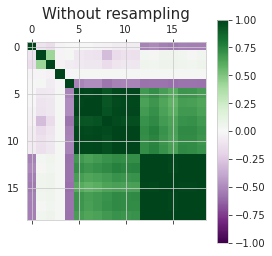

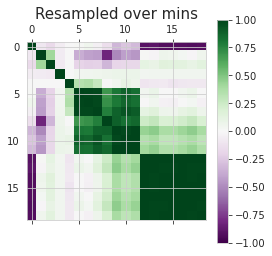

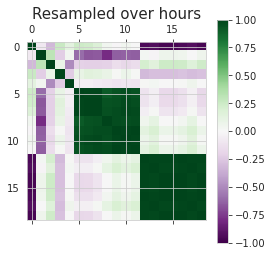

In [23]:
plt.matshow(df_ts.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Without resampling', size=15)
plt.colorbar()
plt.matshow(df_ts.resample('min').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Resampled over mins', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df_ts.resample('H').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Resampled over hours', size=15)
plt.colorbar()
plt.show()

### Augmented Dickey-Fuller Test <br>
- Null Hypothesis: The variable is not stationary
- Alternate Hyphotesis: The variable is stationary

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

In [25]:
result=[]
for i in range(len(df_ts.columns)):
    result = adfuller(df_ts[df_ts.columns[i]])
    if result[1] > 0.05:
        print('{} - Series is not Stationary'.format(df_ts.columns[i]))
    else:
        print('{} - Series is Stationary'.format(df_ts.columns[i]))

CO (ppm) - Series is Stationary
Humidity (%r.h.) - Series is Stationary
Temperature (C) - Series is not Stationary
Flow rate (mL/min) - Series is Stationary
Heater voltage (V) - Series is Stationary
R1 (MOhm) - Series is Stationary
R2 (MOhm) - Series is Stationary
R3 (MOhm) - Series is Stationary
R4 (MOhm) - Series is Stationary
R5 (MOhm) - Series is Stationary
R6 (MOhm) - Series is Stationary
R7 (MOhm) - Series is Stationary
R8 (MOhm) - Series is Stationary
R9 (MOhm) - Series is Stationary
R10 (MOhm) - Series is Stationary
R11 (MOhm) - Series is Stationary
R12 (MOhm) - Series is Stationary
R13 (MOhm) - Series is Stationary
R14 (MOhm) - Series is Stationary


Most of the variables rejected null hypothesis, making the assumption that they're stationary.

### Granger Causality Test <br>
- Null Hypothesis: Xt does not granger causes Yt
- Alternate Hyphotesis: Xt granger causes Yt

In [ ]:
max_lags=10
y='CO (ppm)'
for i in range(len(df_ts.columns)-1):
    results = grangercausalitytests(df_ts[[y,df_ts.columns[i+1]]], max_lags, verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('Column - {} : P_Values - {}'.format(df_ts.columns[i+1],p_values))
    

We fail to reject the alternate hyphotesis and assume that the R8-R14 variables does have granger causality on the target variable.

### Data Pre-Processing.

For the solution of this problem the LSTM model is going to be used as is best-fit for sequencial or time series problems and forecasting.

In [ ]:
df_ts = df_ts.reset_index()
date = datetime.strptime("20160930_203718",'%Y%m%d_%H%M%S')
df_ts['Time (s)'] = [x+date for x in df_ts['Time (s)']]
df_ts.set_index('Time (s)', inplace=True)

In [ ]:
df_ts.head()

In [ ]:
cols = list(df_ts)[12:]
cols.insert(0,'CO (ppm)')
cols

In [ ]:
dataset_train = df_ts[cols].astype(str)

In [ ]:
training_set_noarr = dataset_train[:int(0.9*len(dataset_train))]
training_set = dataset_train[:int(0.9*len(dataset_train))].values
training_set.shape

In [ ]:
test_set = dataset_train[int(0.9*len(dataset_train)):].values
test_set.shape

In [ ]:
# Scaling the sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

training_set_scaled = sc.fit_transform(training_set)
sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])


In [ ]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 20   # Number of steps we want top predict into the future
n_past = 40     # Number of past step we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


### LSTM Model definition

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

### Training Model

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

### Obtaining date lists for future values and training values.

In [ ]:
datelist_train = list(training_set_noarr.index)
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='5s').tolist()

In [ ]:
len(datelist_train)

### Making prediction of n past values

In [ ]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

### Reversing standardization from predictions.

In [ ]:
y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

### Creating dataframes for visualization

In [ ]:
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['CO (ppm)']).set_index(pd.Series(datelist_future))
PREDICTIONS_TRAIN = pd.DataFrame(y_pred_train, columns=['CO (ppm)']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

In [ ]:
PREDICTIONS_TRAIN.head()

In [ ]:
PREDICTIONS_FUTURE.head()

### Visualizing last values from training and the predicted next values.

In [ ]:
# Set plot size 
START = '2016-09-30 21:50:00'

ax = PREDICTIONS_TRAIN[-30:].plot()
PREDICTIONS_FUTURE.plot(ax=ax)
plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2,linestyle='--')
plt.xlabel('Time')
plt.ylabel('CO (ppm)')
plt.legend(bbox_to_anchor=(1.05, 1),labels=['Last Training Data', 'Predicted Values'], loc='upper left')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
y_pred_future.shape

In [ ]:
test_set[1]

In [ ]:
return_rmse(test_set[1],y_pred_future[:8])